# MESSAGE DECODING FROM UNPOOLED SAMPLES

### INPUT, LOAD SEQUENCES

In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import scipy.stats

from turtles.turtles_utils import *

In [2]:
base_path = '/mnt/c/Users/jonst/Northwestern University/Tyo Lab - Shared group resources' \
            '/Publications Presentations & Proposals from Group/Manuscripts' \
            '/2022 - Callisto Strutz - tdt data storage'

#: Overall directory for TdT project data and analysis
tdt_dir = f'{base_path}/02 Analyzed data/'

#: Subdirectory for NGS run
data_dir = f'{base_path}/01 Raw data/20211109_barcoded_rec_1/data/rawDataSingles/'

#: Directory to save generated figures in
figure_dir = f'{base_path}/02 Analyzed data/preliminary_figures/Hello_World_1_unpooled/'

In [3]:
#import conditions table
conditions_df = pd.DataFrame()
conditions_df = pd.read_excel(f'{base_path}/01 Raw data/20211109_barcoded_rec_1/analysis/conditonsTable.xls', header=0)
conditions_df

,Filename,Sample,Category,Replicate,Timepoint,Condition,Position,Base_Condition
0,A1,1C,c,1,1,1,NaN,0
1,A2,2C,c,2,1,1,NaN,0
2,A3,4C,c,3,1,1,NaN,0
3,A4,6C,c,1,1,3,NaN,gg
4,A5,9c,c,2,1,3,NaN,gg
5,A6,10C,c,3,1,3,NaN,gg
6,A7,15C,c,1,1,4,NaN,t
7,A8,16C,c,2,1,4,NaN,t
8,A9,17C,c,3,1,4,NaN,t
9,A10,18C,c,1,0,6,NaN,0


In [40]:
# split controls and message
controls_df = conditions_df[conditions_df['Category']=='c']
message_df = conditions_df[conditions_df['Category']=='r']

controls_df = controls_df.reindex(columns=['Filename', 'Timepoint', 'Base_Condition', 'Condition', 'Replicate'])
message_df = message_df.reindex(columns=['Filename', 'Position', 'Timepoint', 'Base_Condition', 'Condition', 'Replicate'])

In [41]:
controls_df

,Filename,Timepoint,Base_Condition,Condition,Replicate
0,A1,1,0,1,1
1,A2,1,0,1,2
2,A3,1,0,1,3
3,A4,1,gg,3,1
4,A5,1,gg,3,2
5,A6,1,gg,3,3
6,A7,1,t,4,1
7,A8,1,t,4,2
8,A9,1,t,4,3
9,A10,0,0,6,1


In [42]:
message_df

,Filename,Position,Timepoint,Base_Condition,Condition,Replicate
24,C1,1.0,1,g,2,1
25,C2,2.0,1,g,2,1
26,C3,3.0,1,0,1,1
27,C4,4.0,1,tt,5,1
28,C5,5.0,1,g,2,1
29,C6,6.0,0,0,6,1
30,C7,22.0,1,t,4,1
31,C8,7.0,1,g,2,1
32,C9,8.0,0,0,6,1
33,C10,9.0,1,gg,3,1


In [7]:
# hgRNA reverse complements
hgRNA_dict_rc = {'D21': 'CTTGGCCGTAGCGTGAC'}

seqs_dict, hgRNAs, barcodes, insert_barcodes = read_in_vivo_seqs_R2(data_dir, hgRNA_dict_rc)


Read 107373 sequences in A1_S1_L001_R2_001.fastq.gz ...
Number cut and inserted into: 12887
Average length (excluding 0-length seqs): 2.37


Read 100379 sequences in A10_S10_L001_R2_001.fastq.gz ...
Number cut and inserted into: 304
Average length (excluding 0-length seqs): 1.11


Read 110847 sequences in A11_S11_L001_R2_001.fastq.gz ...
Number cut and inserted into: 562
Average length (excluding 0-length seqs): 1.18


Read 80528 sequences in A12_S12_L001_R2_001.fastq.gz ...
Number cut and inserted into: 407
Average length (excluding 0-length seqs): 1.16


Read 96780 sequences in A2_S2_L001_R2_001.fastq.gz ...
Number cut and inserted into: 12039
Average length (excluding 0-length seqs): 2.25


Read 89092 sequences in A3_S3_L001_R2_001.fastq.gz ...
Number cut and inserted into: 11871
Average length (excluding 0-length seqs): 2.52


Read 96479 sequences in A4_S4_L001_R2_001.fastq.gz ...
Number cut and inserted into: 7293
Average length (excluding 0-length seqs): 2.56


Read 115858 seque

# SEQUENCE ANALYSIS

In [43]:
controls_seq_dfs = []
message_seq_dfs = []

controls_filenames = []
message_filenames = []

for filename in seqs_dict:
    formatted_filename = filename.split('_')[0]
    
    if formatted_filename in controls_df.Filename.values:
        controls_filenames.append(formatted_filename)
        controls_seq_df = pd.DataFrame()
        controls_seq_df['Sequence'] = seqs_dict[filename]
        controls_seq_df['hgRNA'] = hgRNAs[filename]
        controls_seq_df['Filename'] = formatted_filename
        controls_seq_dfs.append(controls_seq_df)
    else:
        message_seq_df = pd.DataFrame()
        message_filenames.append(formatted_filename)
        message_seq_df['Sequence'] = seqs_dict[filename]
        message_seq_df['hgRNA'] = hgRNAs[filename]
        message_seq_df['Filename'] = formatted_filename
        message_seq_dfs.append(message_seq_df)

In [44]:
controls_seq_dfs

[      Sequence hgRNA Filename
 0          GAC   D21       A1
 1            G   D21       A1
 2            G   D21       A1
 3           CC   D21       A1
 4          GGT   D21       A1
 ...        ...   ...      ...
 12882        G   D21       A1
 12883  AAGGACC   D21       A1
 12884        G   D21       A1
 12885     CCTG   D21       A1
 12886        G   D21       A1
 
 [12887 rows x 3 columns],
     Sequence hgRNA Filename
 0          G   D21      A10
 1          G   D21      A10
 2          G   D21      A10
 3          G   D21      A10
 4          G   D21      A10
 ..       ...   ...      ...
 299        G   D21      A10
 300        G   D21      A10
 301        G   D21      A10
 302       TT   D21      A10
 303       CG   D21      A10
 
 [304 rows x 3 columns],
     Sequence hgRNA Filename
 0          G   D21      A11
 1          G   D21      A11
 2          G   D21      A11
 3          G   D21      A11
 4          G   D21      A11
 ..       ...   ...      ...
 557        G   D21  

In [45]:
message_seq_dfs

[     Sequence hgRNA Filename
 0           G   D21       C1
 1           G   D21       C1
 2        GCCG   D21       C1
 3       GGGGC   D21       C1
 4        GCCG   D21       C1
 ...       ...   ...      ...
 1768      GAG   D21       C1
 1769        G   D21       C1
 1770       CC   D21       C1
 1771        G   D21       C1
 1772     GGGC   D21       C1
 
 [1773 rows x 3 columns],
      Sequence hgRNA Filename
 0       CCCCC   D21      C10
 1     GGGCCCC   D21      C10
 2           G   D21      C10
 3      GGCCCC   D21      C10
 4       GGGCC   D21      C10
 ...       ...   ...      ...
 7876        G   D21      C10
 7877   GGGTGC   D21      C10
 7878     CCCC   D21      C10
 7879        G   D21      C10
 7880     GCCC   D21      C10
 
 [7881 rows x 3 columns],
       Sequence hgRNA Filename
 0            G   D21      C11
 1            G   D21      C11
 2          GGG   D21      C11
 3         CCCC   D21      C11
 4           GG   D21      C11
 ...        ...   ...      ...
 13047 

In [46]:
for seq_dfs in [controls_seq_dfs, message_seq_dfs]:
    for df in seq_dfs:
        if df['Sequence'].any():
            lengths = df.apply(lambda x: len(x['Sequence']), axis=1)
            df['Length'] = lengths

In [47]:
controls_seq_dfs[0]

,Sequence,hgRNA,Filename,Length
0,GAC,D21,A1,3
1,G,D21,A1,1
2,G,D21,A1,1
3,CC,D21,A1,2
4,GGT,D21,A1,3
...,...,...,...,...
12882,G,D21,A1,1
12883,AAGGACC,D21,A1,7
12884,G,D21,A1,1
12885,CCTG,D21,A1,4


In [48]:
for df, filename in zip(controls_seq_dfs, controls_filenames):
    mean_length = df.Length.mean()
    count = len(df)
    
    #print(filename, mean_length, len(df))
    
    sd_length = df.Length.std()
    controls_df.loc[controls_df.Filename == filename, 'Avg_Length'] = mean_length
    controls_df.loc[controls_df.Filename == filename, 'Std_Length'] = sd_length
    
    #add counts
    controls_df.loc[controls_df.Filename == filename, 'count'] = count

In [49]:
for df, filename in zip(message_seq_dfs, message_filenames):
    mean_length = df.Length.mean()
    #print(filename, mean_length, len(df.Length))
    count = len(df)

    
    sd_length = df.Length.std()
    message_df.loc[message_df.Filename == filename, 'Avg_Length'] = mean_length
    message_df.loc[message_df.Filename == filename, 'Std_Length'] = sd_length
    
        
    #add counts
    message_df.loc[message_df.Filename == filename, 'count'] = count

In [50]:
#Alec - I reset indices here 
controls_df = controls_df.reset_index(drop=True)
controls_df

,Filename,Timepoint,Base_Condition,Condition,Replicate,Avg_Length,Std_Length,count
0,A1,1,0,1,1,2.374874,1.652581,12887.0
1,A2,1,0,1,2,2.252097,1.535153,12039.0
2,A3,1,0,1,3,2.521186,1.792863,11871.0
3,A4,1,gg,3,1,2.560263,1.721041,7293.0
4,A5,1,gg,3,2,2.708089,1.805070,10397.0
5,A6,1,gg,3,3,2.691058,1.918854,8678.0
6,A7,1,t,4,1,2.497295,1.770822,11647.0
7,A8,1,t,4,2,2.434009,1.731509,11797.0
8,A9,1,t,4,3,2.554327,1.820712,9498.0
9,A10,0,0,6,1,1.105263,0.307398,304.0


In [51]:
message_df

,Filename,Position,Timepoint,Base_Condition,Condition,Replicate,Avg_Length,Std_Length,count
24,C1,1.0,1,g,2,1,2.558376,1.751685,1773.0
25,C2,2.0,1,g,2,1,2.550040,1.736936,13819.0
26,C3,3.0,1,0,1,1,2.329893,1.679613,11434.0
27,C4,4.0,1,tt,5,1,2.662344,1.889191,11568.0
28,C5,5.0,1,g,2,1,2.338890,1.708296,14037.0
29,C6,6.0,0,0,6,1,1.286296,0.849066,737.0
30,C7,22.0,1,t,4,1,2.649175,1.850775,14540.0
31,C8,7.0,1,g,2,1,2.507032,1.747966,15429.0
32,C9,8.0,0,0,6,1,1.092466,0.290180,292.0
33,C10,9.0,1,gg,3,1,2.940363,1.982665,7881.0


In [52]:
def count_bases(seq, base):
    count = seq.count(base)
    return count

In [53]:
for df in controls_seq_dfs:
    if len(df) == 0:
        continue
    print('\n', df.Filename.unique()[0])

    # Count A, C, G, T
    print('Counting bases...')
    for base in ['A', 'C', 'G', 'T']:
        df[base] = df.apply(lambda x: count_bases(x['Sequence'], base), axis=1)


 A1
Counting bases...

 A10
Counting bases...

 A11
Counting bases...

 A12
Counting bases...

 A2
Counting bases...

 A3
Counting bases...

 A4
Counting bases...

 A5
Counting bases...

 A6
Counting bases...

 A7
Counting bases...

 A8
Counting bases...

 A9
Counting bases...

 B1
Counting bases...

 B10
Counting bases...

 B11
Counting bases...

 B12
Counting bases...

 B2
Counting bases...

 B3
Counting bases...

 B4
Counting bases...

 B5
Counting bases...

 B6
Counting bases...

 B7
Counting bases...

 B8
Counting bases...

 B9
Counting bases...


In [54]:
for df in message_seq_dfs:
    if len(df) == 0:
        continue
    print('\n', df.Filename.unique()[0])

    # Count A, C, G, T
    print('Counting bases...')
    for base in ['A', 'C', 'G', 'T']:
        df[base] = df.apply(lambda x: count_bases(x['Sequence'], base), axis=1)


 C1
Counting bases...

 C10
Counting bases...

 C11
Counting bases...

 C12
Counting bases...

 C2
Counting bases...

 C3
Counting bases...

 C4
Counting bases...

 C5
Counting bases...

 C6
Counting bases...

 C7
Counting bases...

 C8
Counting bases...

 C9
Counting bases...

 D1
Counting bases...

 D10
Counting bases...

 D11
Counting bases...

 D12
Counting bases...

 D2
Counting bases...

 D3
Counting bases...

 D4
Counting bases...

 D5
Counting bases...

 D6
Counting bases...

 D7
Counting bases...

 D8
Counting bases...

 D9
Counting bases...


In [55]:
for df, filename in zip(controls_seq_dfs, controls_filenames):
    a = df.A.sum()
    c = df.C.sum()
    g = df.G.sum()
    t = df['T'].sum()
    
    if not a:
        a = 1
    if not c:
        c = 1
    if not g:
        g = 1
    if not t:
        t = 1
    
    total = a + c + g + t
    
    controls_df.loc[controls_df.Filename == filename, 'A%'] = a / total
    controls_df.loc[controls_df.Filename == filename, 'C%'] = c / total
    controls_df.loc[controls_df.Filename == filename, 'G%'] = g / total
    controls_df.loc[controls_df.Filename == filename, 'T%'] = t / total

In [56]:
for df, filename in zip(message_seq_dfs, message_filenames):
    a = df.A.sum()
    c = df.C.sum()
    g = df.G.sum()
    t = df['T'].sum()
    
    if not a:
        a = 1
    if not c:
        c = 1
    if not g:
        g = 1
    if not t:
        t = 1

    total = a + c + g + t
    
    message_df.loc[message_df.Filename == filename, 'A%'] = a / total
    message_df.loc[message_df.Filename == filename, 'C%'] = c / total
    message_df.loc[message_df.Filename == filename, 'G%'] = g / total
    message_df.loc[message_df.Filename == filename, 'T%'] = t / total

In [57]:
controls_df

,Filename,Timepoint,Base_Condition,Condition,Replicate,Avg_Length,Std_Length,count,A%,C%,G%,T%
0,A1,1,0,1,1,2.374874,1.652581,12887.0,0.136387,0.236440,0.556921,0.070252
1,A2,1,0,1,2,2.252097,1.535153,12039.0,0.108255,0.259073,0.532495,0.100177
2,A3,1,0,1,3,2.521186,1.792863,11871.0,0.116513,0.270683,0.517342,0.095462
3,A4,1,gg,3,1,2.560263,1.721041,7293.0,0.018103,0.403996,0.550319,0.027583
4,A5,1,gg,3,2,2.708089,1.805070,10397.0,0.029194,0.384643,0.560911,0.025252
5,A6,1,gg,3,3,2.691058,1.918854,8678.0,0.024108,0.363337,0.576029,0.036526
6,A7,1,t,4,1,2.497295,1.770822,11647.0,0.123367,0.252716,0.502269,0.121648
7,A8,1,t,4,2,2.434009,1.731509,11797.0,0.125723,0.254614,0.498085,0.121578
8,A9,1,t,4,3,2.554327,1.820712,9498.0,0.140143,0.245579,0.495693,0.118585
9,A10,0,0,6,1,1.105263,0.307398,304.0,0.077381,0.008929,0.842262,0.071429


In [58]:
message_df

,Filename,Position,Timepoint,Base_Condition,Condition,Replicate,Avg_Length,Std_Length,count,A%,C%,G%,T%
24,C1,1.0,1,g,2,1,2.558376,1.751685,1773.0,0.085317,0.290564,0.542328,0.081790
25,C2,2.0,1,g,2,1,2.550040,1.736936,13819.0,0.079741,0.281421,0.584494,0.054343
26,C3,3.0,1,0,1,1,2.329893,1.679613,11434.0,0.111036,0.266554,0.536562,0.085848
27,C4,4.0,1,tt,5,1,2.662344,1.889191,11568.0,0.175596,0.231703,0.416034,0.176667
28,C5,5.0,1,g,2,1,2.338890,1.708296,14037.0,0.081478,0.275715,0.580031,0.062776
29,C6,6.0,0,0,6,1,1.286296,0.849066,737.0,0.093882,0.046414,0.816456,0.043249
30,C7,22.0,1,t,4,1,2.649175,1.850775,14540.0,0.125652,0.261481,0.470443,0.142423
31,C8,7.0,1,g,2,1,2.507032,1.747966,15429.0,0.090665,0.285980,0.554148,0.069207
32,C9,8.0,0,0,6,1,1.092466,0.290180,292.0,0.119122,0.068966,0.802508,0.009404
33,C10,9.0,1,gg,3,1,2.940363,1.982665,7881.0,0.019032,0.417746,0.543285,0.019938


In [59]:
aitch_pcts = pd.DataFrame(clr(controls_df.loc[:, ['A%', 'C%', 'G%', 'T%']]),
                          columns=['A_aitch', 'C_aitch', 'G_aitch', 'T_aitch'])
controls_df = pd.concat([controls_df, aitch_pcts], axis=1)
controls_df

,Filename,Timepoint,Base_Condition,Condition,Replicate,Avg_Length,Std_Length,count,A%,C%,G%,T%,A_aitch,C_aitch,G_aitch,T_aitch
0,A1,1,0,1,1,2.374874,1.652581,12887.0,0.136387,0.236440,0.556921,0.070252,-0.323428,0.226766,1.083496,-0.986835
1,A2,1,0,1,2,2.252097,1.535153,12039.0,0.108255,0.259073,0.532495,0.100177,-0.597041,0.275584,0.996046,-0.674589
2,A3,1,0,1,3,2.521186,1.792863,11871.0,0.116513,0.270683,0.517342,0.095462,-0.533594,0.309351,0.957107,-0.732864
3,A4,1,gg,3,1,2.560263,1.721041,7293.0,0.018103,0.403996,0.550319,0.027583,-1.735218,1.370111,1.679205,-1.314097
4,A5,1,gg,3,2,2.708089,1.805070,10397.0,0.029194,0.384643,0.560911,0.025252,-1.347212,1.231123,1.608370,-1.492280
5,A6,1,gg,3,3,2.691058,1.918854,8678.0,0.024108,0.363337,0.576029,0.036526,-1.575465,1.137311,1.598139,-1.159985
6,A7,1,t,4,1,2.497295,1.770822,11647.0,0.123367,0.252716,0.502269,0.121648,-0.526762,0.190344,0.877213,-0.540795
7,A8,1,t,4,2,2.434009,1.731509,11797.0,0.125723,0.254614,0.498085,0.121578,-0.512211,0.193461,0.864481,-0.545731
8,A9,1,t,4,3,2.554327,1.820712,9498.0,0.140143,0.245579,0.495693,0.118585,-0.414307,0.146653,0.848989,-0.581334
9,A10,0,0,6,1,1.105263,0.307398,304.0,0.077381,0.008929,0.842262,0.071429,-0.036956,-2.196440,2.350395,-0.116999


In [60]:
aitch_pcts = pd.DataFrame(clr(message_df.loc[:, ['A%', 'C%', 'G%', 'T%']]),
                          columns=['A_aitch', 'C_aitch', 'G_aitch', 'T_aitch'])

message_df = pd.concat([message_df.reset_index(), aitch_pcts], axis=1)
message_df

,index,Filename,Position,Timepoint,Base_Condition,Condition,Replicate,Avg_Length,Std_Length,count,A%,C%,G%,T%,A_aitch,C_aitch,G_aitch,T_aitch
0,24,C1,1.0,1,g,2,1,2.558376,1.751685,1773.0,0.085317,0.290564,0.542328,0.081790,-0.758179,0.467267,1.091313,-0.800401
1,25,C2,2.0,1,g,2,1,2.550040,1.736936,13819.0,0.079741,0.281421,0.584494,0.054343,-0.717390,0.543676,1.274571,-1.100857
2,26,C3,3.0,1,0,1,1,2.329893,1.679613,11434.0,0.111036,0.266554,0.536562,0.085848,-0.548444,0.327278,1.026882,-0.805717
3,27,C4,4.0,1,tt,5,1,2.662344,1.889191,11568.0,0.175596,0.231703,0.416034,0.176667,-0.286484,-0.009211,0.576097,-0.280401
4,28,C5,5.0,1,g,2,1,2.338890,1.708296,14037.0,0.081478,0.275715,0.580031,0.062776,-0.730257,0.488779,1.232493,-0.991015
5,29,C6,6.0,0,0,6,1,1.286296,0.849066,737.0,0.093882,0.046414,0.816456,0.043249,-0.170856,-0.875303,1.992079,-0.945920
6,30,C7,22.0,1,t,4,1,2.649175,1.850775,14540.0,0.125652,0.261481,0.470443,0.142423,-0.544572,0.188273,0.775585,-0.419287
7,31,C8,7.0,1,g,2,1,2.507032,1.747966,15429.0,0.090665,0.285980,0.554148,0.069207,-0.672239,0.476516,1.138025,-0.942303
8,32,C9,8.0,0,0,6,1,1.092466,0.290180,292.0,0.119122,0.068966,0.802508,0.009404,0.294482,-0.252062,2.202073,-2.244492
9,33,C10,9.0,1,gg,3,1,2.940363,1.982665,7881.0,0.019032,0.417746,0.543285,0.019938,-1.621707,1.467066,1.729827,-1.575187


In [61]:
controls_df.to_csv(figure_dir + 'controls_pcts.csv')

In [62]:
message_df.to_csv(figure_dir + 'message_pcts.csv')

In [63]:
numeric_only = controls_df.loc[:, ['Condition', 'Avg_Length', 'A_aitch', 'C_aitch', 'G_aitch', 'T_aitch']]

In [64]:
numeric_only

,Condition,Avg_Length,A_aitch,C_aitch,G_aitch,T_aitch
0,1,2.374874,-0.323428,0.226766,1.083496,-0.986835
1,1,2.252097,-0.597041,0.275584,0.996046,-0.674589
2,1,2.521186,-0.533594,0.309351,0.957107,-0.732864
3,3,2.560263,-1.735218,1.370111,1.679205,-1.314097
4,3,2.708089,-1.347212,1.231123,1.608370,-1.492280
5,3,2.691058,-1.575465,1.137311,1.598139,-1.159985
6,4,2.497295,-0.526762,0.190344,0.877213,-0.540795
7,4,2.434009,-0.512211,0.193461,0.864481,-0.545731
8,4,2.554327,-0.414307,0.146653,0.848989,-0.581334
9,6,1.105263,-0.036956,-2.196440,2.350395,-0.116999


In [65]:
conditions_df_mean = numeric_only.astype('float').groupby('Condition').mean()
conditions_df_std = numeric_only.astype('float').groupby('Condition').std()

In [66]:
conditions_df_mean

,Avg_Length,A_aitch,C_aitch,G_aitch,T_aitch
Condition,,,,,
1.0,2.382719,-0.484688,0.270567,1.012216,-0.798096
2.0,2.405490,-0.741978,0.455945,1.174912,-0.888879
3.0,2.653137,-1.552632,1.246182,1.628571,-1.322121
4.0,2.495210,-0.484427,0.176819,0.863561,-0.555953
5.0,2.810777,-0.361502,-0.087158,0.534283,-0.085624
6.0,1.148595,-0.192376,-0.854447,1.886761,-0.839938
7.0,1.673771,0.312696,-1.218594,2.211857,-1.305959
8.0,1.369446,-0.070882,-0.262145,1.669167,-1.336141


In [67]:
conditions_df_std

,Avg_Length,A_aitch,C_aitch,G_aitch,T_aitch
Condition,,,,,
1.0,0.134716,0.143213,0.041521,0.064728,0.166029
2.0,0.070143,0.016901,0.026986,0.012133,0.032821
3.0,0.080880,0.195008,0.117128,0.044147,0.166293
4.0,0.060186,0.061160,0.026172,0.014135,0.022119
5.0,0.164488,0.067682,0.026430,0.037154,0.027187
6.0,0.039719,0.183514,1.234345,0.424529,0.644555
7.0,0.627757,0.653952,0.854481,1.087502,0.825566
8.0,0.274385,0.946449,0.158663,0.994890,1.511770


## MESSAGE DECODING

In [95]:
pdfs = pd.DataFrame(columns=['Filename', 'Condition', 'PDF_len', 'PDF_A', 'PDF_C', 'PDF_G', 'PDF_T'])

for condition, avg_len, std_len, avg_aitch, std_aitch in zip(
    conditions_df_mean.index,
    conditions_df_mean.Avg_Length,
    conditions_df_std.Avg_Length,
    conditions_df_mean.loc[:, ['A_aitch', 'C_aitch', 'G_aitch', 'T_aitch']].values,
    conditions_df_std.loc[:, ['A_aitch', 'C_aitch', 'G_aitch', 'T_aitch']].values):
    
    length_dist = scipy.stats.norm(avg_len, std_len)

    a_dist = scipy.stats.norm(avg_aitch[0], std_aitch[0])
    c_dist = scipy.stats.norm(avg_aitch[1], std_aitch[1])
    g_dist = scipy.stats.norm(avg_aitch[2], std_aitch[2])
    t_dist = scipy.stats.norm(avg_aitch[3], std_aitch[3])

    if condition in [7, 8]:
        continue  # don't actually use these for encoding
    print(condition)
    
    for filename, avg_len, avg_aitch in zip(
        message_df.Filename,
        message_df.Avg_Length,
        message_df.loc[:, ['A_aitch', 'C_aitch', 'G_aitch', 'T_aitch']].values,
    ):
        len_pdf = length_dist.pdf(avg_len)
        a_pdf = a_dist.pdf(avg_aitch[0])
        c_pdf = c_dist.pdf(avg_aitch[1])
        g_pdf = g_dist.pdf(avg_aitch[2])
        t_pdf = t_dist.pdf(avg_aitch[3])
        
        this_cond_pdfs = {
            'Filename': filename,
            'Condition': condition,
            'PDF_len': len_pdf,
            'PDF_A': a_pdf,
            'PDF_C': c_pdf,
            'PDF_G': g_pdf,
            'PDF_T': t_pdf
        }
        
        pdfs = pdfs.append(this_cond_pdfs, ignore_index=True)

1.0
2.0
3.0
4.0
5.0
6.0


In [96]:
pdfs = pdfs.sort_values(['Filename', 'Condition']).reset_index(drop=True)

In [97]:
pdfs['PDF_Total'] = pdfs['PDF_len'] * (pdfs['PDF_A'] + pdfs['PDF_C'] + pdfs['PDF_G'] + pdfs['PDF_T'])

In [100]:
pdfs.Filename.unique()

array(['C1', 'C10', 'C11', 'C12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7',
       'C8', 'C9', 'D1', 'D10', 'D11', 'D12', 'D2', 'D3', 'D4', 'D5',
       'D6', 'D7', 'D8', 'D9'], dtype=object)

In [106]:
pos_seq = [1, 9, 10, 11, 2, 3, 4, 5, 6, 22, 7, 8, 12, 19, 20, 21, 23, 13, 14, 24, 15, 16, 17, 18]
pos_col = []
for pos in pos_seq:
    pos_col += [pos] * 6

pdfs['Position'] = pos_col 
pdfs

,Filename,Condition,PDF_len,PDF_A,PDF_C,PDF_G,PDF_T,PDF_Total,Position
0,C1,1.0,1.265625e+00,4.497990e-01,1.285898e-04,2.921184e+00,2.402609e+00,7.307364e+00,1
1,C1,2.0,5.288164e-01,1.490956e+01,1.353775e+01,1.616734e-09,3.211401e-01,1.521323e+01,1
2,C1,3.0,2.483078e+00,5.091638e-04,8.495518e-10,6.260484e-32,1.748482e-02,4.468047e-02,1
3,C1,4.0,3.821537e+00,2.910287e-04,2.745944e-26,1.179382e-55,5.419128e-26,1.112177e-03,1
4,C1,5.0,7.472833e-01,2.048341e-07,4.232316e-95,1.665346e-48,1.185731e-149,1.530691e-07,1
...,...,...,...,...,...,...,...,...,...
139,D9,2.0,1.977258e-72,0.000000e+00,0.000000e+00,0.000000e+00,2.509237e-238,4.961409e-310,18
140,D9,3.0,1.240887e-77,3.655422e-65,7.826212e-296,2.462458e-288,1.028520e-03,1.276277e-80,18
141,D9,4.0,1.382164e-112,8.741001e-307,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,18
142,D9,5.0,3.586954e-23,1.867400e-224,0.000000e+00,0.000000e+00,0.000000e+00,6.698280e-247,18


In [107]:
pdfs

,Filename,Condition,PDF_len,PDF_A,PDF_C,PDF_G,PDF_T,PDF_Total,Position
0,C1,1.0,1.265625e+00,4.497990e-01,1.285898e-04,2.921184e+00,2.402609e+00,7.307364e+00,1
1,C1,2.0,5.288164e-01,1.490956e+01,1.353775e+01,1.616734e-09,3.211401e-01,1.521323e+01,1
2,C1,3.0,2.483078e+00,5.091638e-04,8.495518e-10,6.260484e-32,1.748482e-02,4.468047e-02,1
3,C1,4.0,3.821537e+00,2.910287e-04,2.745944e-26,1.179382e-55,5.419128e-26,1.112177e-03,1
4,C1,5.0,7.472833e-01,2.048341e-07,4.232316e-95,1.665346e-48,1.185731e-149,1.530691e-07,1
...,...,...,...,...,...,...,...,...,...
139,D9,2.0,1.977258e-72,0.000000e+00,0.000000e+00,0.000000e+00,2.509237e-238,4.961409e-310,18
140,D9,3.0,1.240887e-77,3.655422e-65,7.826212e-296,2.462458e-288,1.028520e-03,1.276277e-80,18
141,D9,4.0,1.382164e-112,8.741001e-307,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,18
142,D9,5.0,3.586954e-23,1.867400e-224,0.000000e+00,0.000000e+00,0.000000e+00,6.698280e-247,18


In [108]:
pdfs.to_csv(figure_dir + '/final_scores.csv')

In [109]:
idx = pdfs.groupby(['Filename'])['PDF_Total'].transform(max) == pdfs['PDF_Total']

In [110]:
pdfs[idx].reindex([1, 25, 30, 40, 43, 53, 57, 61, 71, 8, 14, 22,
                   74, 99, 105, 112, 117, 122, 128, 134, 143, 79, 89, 93]).reset_index(drop=True)

,Filename,Condition,PDF_len,PDF_A,PDF_C,PDF_G,PDF_T,PDF_Total,Position
0,C1,2.0,0.528816,1.490956e+01,13.537748,1.616734e-09,3.211401e-01,15.213225,1
1,C2,2.0,0.680351,8.192210e+00,0.074955,7.368309e-14,1.063168e-08,5.624570,2
2,C3,1.0,2.742218,2.522846e+00,3.780492,6.007192e+00,2.400311e+00,40.340339,3
3,C4,5.0,1.614179,3.189127e+00,0.195063,5.700040e+00,1.050068e-10,14.663570,4
4,C5,2.0,3.623790,1.855967e+01,7.052014,4.230775e-04,9.591028e-02,93.160461,5
5,C6,6.0,0.024657,2.159010e+00,0.323155,9.112515e-01,6.106319e-01,0.098729,6
6,C7,4.0,0.251420,4.022011e+00,13.851265,1.092333e-07,9.247945e-08,4.493703,22
7,C8,2.0,1.994587,4.737815e-03,11.055833,3.236431e-01,3.231588e+00,29.152492,7
8,C9,6.0,3.700502,6.440239e-02,0.286917,7.132027e-01,5.761349e-02,4.152467,8
9,C10,3.0,0.009006,1.921375e+00,0.575433,6.511606e-01,7.536082e-01,0.035138,9


In [111]:
pdfs[idx].to_csv(figure_dir + '/final_top_scores.csv')

In [112]:
final_pdfs = pdfs.drop(['Filename', 'PDF_len', 'PDF_A', 'PDF_C', 'PDF_G', 'PDF_T'], axis=1)
final_pdfs = final_pdfs.loc[final_pdfs.Position <= 22]
final_pdfs = final_pdfs.pivot(['Position'], ['Condition'])
final_pdfs = final_pdfs.apply(lambda x: x / x.max(), axis=1)
final_pdfs

PDF_Total                                              \
Condition           1.0            2.0           3.0            4.0   
Position                                                              
1          4.803297e-01   1.000000e+00  2.936949e-03   7.310594e-05   
2          2.924926e-01   1.000000e+00  3.853386e-01   3.588432e-03   
3          1.000000e+00   3.869983e-02  8.035296e-07   1.425285e-02   
4          2.547961e-02   2.139089e-67  2.893193e-09   3.315353e-04   
5          5.675849e-02   1.000000e+00  9.233268e-06   4.937333e-06   
6          2.316580e-13   8.049702e-54  8.935216e-62   2.109556e-91   
7          2.496272e-01   1.000000e+00  5.850771e-03   1.303398e-02   
8          8.942863e-27  5.598240e-225  8.354363e-88  6.954606e-153   
9          6.741322e-07  5.211244e-105  1.000000e+00   1.333940e-84   
10         1.474559e-03   1.470654e-12  1.000000e+00   2.751188e-88   
11         7.399471e-02   5.831276e-40  1.031522e-06   1.985758e-02   
12         1.259190e-04   5.029418e-40  1.000000e+00   2.886922e-67   
13         7.601238e-01   1.299456e-12  1.411109e-08   1.000000e+00   
14         1.875863e-01   2.407925e-26  8.131488e-07   6.888456e-01   
15         1.359371e-05   5.826888e-91  1.000000e+00   4.531133e-43   
16         9.443956e-04   1.824829e-75  1.000000e+00   1.794365e-18   
17         1.250347e-08  2.933559e-136  1.000000e+00   3.142054e-85   
18         5.370259e-30  2.975390e-310  7.653918e-81   0.000000e+00   
19         5.199066e-02   1.000000e+00  3.014570e-04   3.119473e-05   
20         8.245580e-27  4.901451e-129  6.226429e-96  2.048531e-115   
21         8.574147e-02   2.870417e-16  1.317830e-06   1.000000e+00   
22         3.807766e-01   1.938398e-23  4.579149e-06   1.000000e+00   

                                         
Condition            5.0            6.0  
Position                                 
1           1.006158e-08  1.749980e-274  
2           7.170851e-07  8.993583e-271  
3           1.088685e-04  2.639335e-193  
4           1.000000e+00  6.967631e-316  
5           8.972378e-10  1.137956e-196  
6           6.104807e-19   1.000000e+00  
7           2.360122e-06  3.616919e-255  
8           6.242122e-32   1.000000e+00  
9           1.558865e-73   0.000000e+00  
10          2.130455e-84   0.000000e+00  
11          1.000000e+00   0.000000e+00  
12          3.727690e-66   0.000000e+00  
13          3.425446e-05  2.409477e-204  
14          1.000000e+00  1.067172e-276  
15          1.838341e-30   0.000000e+00  
16          1.867764e-23  1.455298e-260  
17          3.191720e-78   0.000000e+00  
18         4.017003e-247   1.000000e+00  
19          1.236203e-09  6.939407e-243  
20          4.025239e-24   1.000000e+00  
21          1.267884e-03  3.864774e-268  
22          5.061898e-02  2.811883e-310

In [113]:
sns.set(font='Times New Roman', font_scale=1.5)
cmap = sns.color_palette("light:mediumseagreen", as_cmap=True)

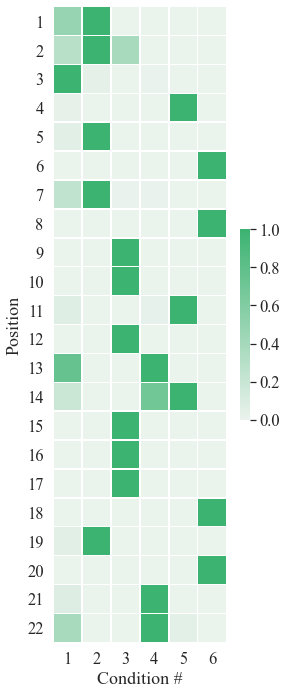

In [114]:
fig, ax = plt.subplots(figsize=(4.5,10))

sns.heatmap(final_pdfs, ax=ax, linewidths=.5, linecolor=None, cbar_kws={'shrink': .3},
            square=True, cmap=cmap)

ax.set_yticklabels(range(1, 23), rotation=0)
ax.set_xticklabels(range(1, 7), rotation=0)

ax.set_xlabel('Condition #')

plt.tight_layout()
plt.show()

fig.savefig(figure_dir + '/PDF_heatmap.png')
fig.savefig(figure_dir + '/PDF_heatmap.svg')